<a href="https://colab.research.google.com/github/sundeepmuddana/DEVCODEEDUR/blob/master/sundeepdhamodhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

locations = ['79936', '10001', '30301', '60601', '90001']
departments = ['Electronics', 'Appliances']
categories = {
    'Electronics': ['Mobile Phones', 'Laptops', 'Tablets'],
    'Appliances': ['Refrigerators', 'Washing Machines', 'Microwaves']
}
products = {
    'Mobile Phones': [
        {'name': 'iPhone 14', 'brand': 'Apple', 'size': '128 GB', 'price': 25000.99},
        {'name': 'Galaxy S23', 'brand': 'Samsung', 'size': '128 GB', 'price': 40000.99},
        {'name': 'Pixel 7', 'brand': 'Google', 'size': '128 GB', 'price': 35000.99}
    ],
    'Laptops': [
        {'name': 'MacBook Air', 'brand': 'Apple', 'size': '256 GB', 'price': 70000.99},
        {'name': 'XPS 13', 'brand': 'Dell', 'size': '256 GB', 'price': 80000.99},
        {'name': 'ThinkPad X1', 'brand': 'Lenovo', 'size': '512 GB', 'price': 90000.99}
    ],
    'Tablets': [
        {'name': 'iPad Pro', 'brand': 'Apple', 'size': '128 GB', 'price': 45000.99},
        {'name': 'Galaxy Tab S8', 'brand': 'Samsung', 'size': '128 GB', 'price': 35000.99},
        {'name': 'Surface Pro 9', 'brand': 'Microsoft', 'size': '256 GB', 'price': 32000.99}
    ],
    'Refrigerators': [
        {'name': 'French Door Refrigerator', 'brand': 'LG', 'size': '25 Cu. Ft.', 'price': 75000.99},
        {'name': 'Side-by-Side Refrigerator', 'brand': 'Samsung', 'size': '28 Cu. Ft.', 'price': 85000.99},
        {'name': 'Top Freezer Refrigerator', 'brand': 'Whirlpool', 'size': '20 Cu. Ft.', 'price': 65000.99}
    ],
    'Washing Machines': [
        {'name': 'Front Load Washer', 'brand': 'LG', 'size': '4.5 Cu. Ft.', 'price': 25000.99},
        {'name': 'Top Load Washer', 'brand': 'Samsung', 'size': '5.0 Cu. Ft.', 'price': 15000.99},
        {'name': 'Portable Washer', 'brand': 'GE', 'size': '2.8 Cu. Ft.', 'price': 10000.99}
    ],
    'Microwaves': [
        {'name': 'Over-the-Range Microwave', 'brand': 'GE', 'size': '1.7 Cu. Ft.', 'price': 12000.99},
        {'name': 'Countertop Microwave', 'brand': 'Panasonic', 'size': '1.2 Cu. Ft.', 'price': 13000.99},
        {'name': 'Built-in Microwave', 'brand': 'Bosch', 'size': '1.6 Cu. Ft.', 'price': 18000.99}
    ]
}

num_rows = 10000

sale_events = ['Dhamaka Sale', 'Big Billion Sale', 'Festive Offer', 'Flash Sale', 'End of Season Sale']
demand_levels = ['High', 'Low']
inventory_levels = ['High', 'Medium', 'Low']
competitor_pricing_levels = ['High', 'Low']
time_of_day = ['AM', 'PM']

rows = []
for i in range(num_rows):
    location = random.choice(locations)
    department = random.choice(departments)
    category = random.choice(categories[department])

    if category not in products:
        print(f"Category '{category}' not found in products dictionary.")
        continue

    product = random.choice(products[category])
    row = {
        'SHIPPING_LOCATION': location,
        'DEPARTMENT': department,
        'CATEGORY': category,
        'SUBCATEGORY': np.nan,
        'BREADCRUMBS': f'{department}/{category}',
        'SKU': random.randint(100000000, 999999999),
        'PRODUCT_URL': f'https://www.walmart.com/ip/{product["name"].replace(" ", "-")}',
        'PRODUCT_NAME': f'{product["brand"]} {product["name"]}, {product["size"]}',
        'BRAND': product['brand'],
        'PRICE_RETAIL': product['price'],
        'PRICE_CURRENT': product['price'],
        'PRODUCT_SIZE': product['size'].split(' ')[0],
        'PROMOTION': np.nan,
        'RunDate': (datetime(2022, 1, 1) + timedelta(days=random.randint(0, 365))).strftime('%Y-%m-%d %H:%M:%S'),
        'SALE_EVENT': random.choice(sale_events),
        'DEMAND': random.choice(demand_levels),  # Adding DEMAND column
        'INVENTORY_LEVEL': random.choice(inventory_levels),  # Adding INVENTORY_LEVEL column
        'COMPETITOR_PRICING': random.choice(competitor_pricing_levels),  # Adding COMPETITOR_PRICING column
        'TIME_OF_DAY': random.choice(time_of_day)  # Adding TIME_OF_DAY column
    }
    rows.append(row)

df = pd.DataFrame(rows)

df['RunDate'] = pd.to_datetime(df['RunDate'])

df.to_csv('retail_large_sample_data_with_features.csv', index=False)

print("Large sample CSV file with retail products and additional features created successfully.")

Large sample CSV file with retail products and additional features created successfully.


In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/retail_large_sample_data_with_features.csv')

# Extract month
df['Month'] = pd.to_datetime(df['RunDate']).dt.month

# Fill NaN values in the 'PROMOTION' column
df.fillna({'PROMOTION': 'None'}, inplace=True)

# Add indicators for sale events and mobile phones
sale_events = ['Dhamaka Sale', 'Big Billion Sale', 'Festive Offer', 'Flash Sale', 'End of Season Sale']

df['IsDhamakaSale'] = (df['SALE_EVENT'] == 'Dhamaka Sale').astype(int)
df['IsBigBillionSale'] = (df['SALE_EVENT'] == 'Big Billion Sale').astype(int)
df['IsFestiveOffer'] = (df['SALE_EVENT'] == 'Festive Offer').astype(int)
df['IsFlashSale'] = (df['SALE_EVENT'] == 'Flash Sale').astype(int)
df['IsEndOfSeasonSale'] = (df['SALE_EVENT'] == 'End of Season Sale').astype(int)
df['IsMobilePhone'] = (df['CATEGORY'] == 'Mobile Phones').astype(int)

# Add new indicators for demand, inventory, competitor pricing, and time of day
df['DEMAND'] = np.random.choice(['High', 'Low'], size=len(df))
df['INVENTORY_LEVEL'] = np.random.choice(['High', 'Medium', 'Low'], size=len(df))
df['COMPETITOR_PRICING'] = np.random.choice(['High', 'Low'], size=len(df))
df['TIME_OF_DAY'] = np.random.choice(['AM', 'PM'], size=len(df))

# Calculate price change and days since last price update
df['Price_Change'] = df.groupby('SKU')['PRICE_CURRENT'].pct_change().fillna(0)
df['Days_Since_Last_Price_Update'] = (pd.to_datetime(df['RunDate']) - pd.to_datetime(df.groupby('SKU')['RunDate'].shift(1))).dt.days.fillna(0)

# Update promotion based on sale events, mobile phone category, and additional features
def update_promotion(row):
    if row['IsMobilePhone']:
        if row['IsDhamakaSale']:
            return 'Dhamaka Sale Discount'
        elif row['IsBigBillionSale']:
            return 'Big Billion Sale Discount'
        elif row['IsFestiveOffer']:
            return 'Festive Offer Discount'
        elif row['IsFlashSale']:
            return 'Flash Sale Discount'
        elif row['IsEndOfSeasonSale']:
            return 'End of Season Sale Discount'

        if row['DEMAND'] == 'High':
            if row['INVENTORY_LEVEL'] == 'Low':
                return 'High Demand, Low Inventory Discount'
            elif row['COMPETITOR_PRICING'] == 'High':
                return 'High Demand, High Competitor Pricing Discount'

        if row['TIME_OF_DAY'] == 'PM' and row['COMPETITOR_PRICING'] == 'Low':
            return 'Evening Special Discount'

    return 'Regular'

df['PROMOTION'] = df.apply(update_promotion, axis=1)

# Save the updated data to a new CSV file
df.to_csv('updated_walmart_data_with_full_features_promotions.csv', index=False)

print("Data preprocessing with additional features completed successfully.")

Data preprocessing with additional features completed successfully.


In [40]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
df = pd.read_csv('updated_walmart_data_with_full_features_promotions.csv')

# Feature engineering
df['Price_Retail_Log'] = np.log1p(df['PRICE_RETAIL'])
df['Price_Current_Log'] = np.log1p(df['PRICE_CURRENT'])
df['Product_Length'] = df['PRODUCT_NAME'].apply(lambda x: len(x))
df['IsHighPrice'] = (df['PRICE_RETAIL'] > df['PRICE_RETAIL'].median()).astype(int)

# Adding random noise to PRICE_CURRENT to simulate variability
np.random.seed(42)
df['PRICE_CURRENT'] = df['PRICE_CURRENT'] + np.random.normal(0, 0.1 * df['PRICE_CURRENT'].mean(), df.shape[0])

# Define features and target variable
features = ['PRICE_RETAIL', 'IsEndOfSeasonSale',
            'IsMobilePhone', 'Price_Change', 'Days_Since_Last_Price_Update', 'Price_Retail_Log',
            'Price_Current_Log', 'IsHighPrice', 'DEMAND', 'INVENTORY_LEVEL',
            'COMPETITOR_PRICING', 'TIME_OF_DAY']
X = pd.get_dummies(df[features], drop_first=True)  # Convert categorical features to dummy variables
y = df['PRICE_CURRENT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Increased n_estimators for better performance
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regressor - Mean Squared Error: {mse:.4f}")
print(f"Random Forest Regressor - R^2 Score: {r2:.4f}")

# Save the model as a pickle file
with open('random_forest_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'random_forest_price_prediction_model.pkl'")

Random Forest Regressor - Mean Squared Error: 20255201.9970
Random Forest Regressor - R^2 Score: 0.9733
Model saved as 'random_forest_price_prediction_model.pkl'


In [43]:
from sklearn.tree import DecisionTreeRegressor
model_1=DecisionTreeRegressor(max_depth=5)
model_1.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=5)

In [44]:
y_pred = model_1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_dec = r2_score(y_test, y_pred)
print(r2_dec)
print(mse)

0.9758920278382784
18311486.44105009


In [45]:
# print(df.Adjusted_Price)
# print(df.PRICE_RETAIL)
print(df.columns)

Index(['SHIPPING_LOCATION', 'DEPARTMENT', 'CATEGORY', 'SUBCATEGORY',
       'BREADCRUMBS', 'SKU', 'PRODUCT_URL', 'PRODUCT_NAME', 'BRAND',
       'PRICE_RETAIL', 'PRICE_CURRENT', 'PRODUCT_SIZE', 'PROMOTION', 'RunDate',
       'SALE_EVENT', 'DEMAND', 'INVENTORY_LEVEL', 'COMPETITOR_PRICING',
       'TIME_OF_DAY', 'Month', 'IsDhamakaSale', 'IsBigBillionSale',
       'IsFestiveOffer', 'IsFlashSale', 'IsEndOfSeasonSale', 'IsMobilePhone',
       'Price_Change', 'Days_Since_Last_Price_Update', 'Price_Retail_Log',
       'Price_Current_Log', 'Product_Length', 'IsHighPrice'],
      dtype='object')


In [56]:
# Example adjustment logic (assuming a 10% discount during any sale)
df['Adjusted_Price'] = df['PRICE_RETAIL']

# Apply a 10% discount if any sale flag is true
sale_flags = ['IsEndOfSeasonSale']
df['Adjusted_Price'] = df.apply(lambda row: row['PRICE_RETAIL'] * 0.9 if any(row[flag] == 1 for flag in sale_flags) else row['PRICE_RETAIL'], axis=1)

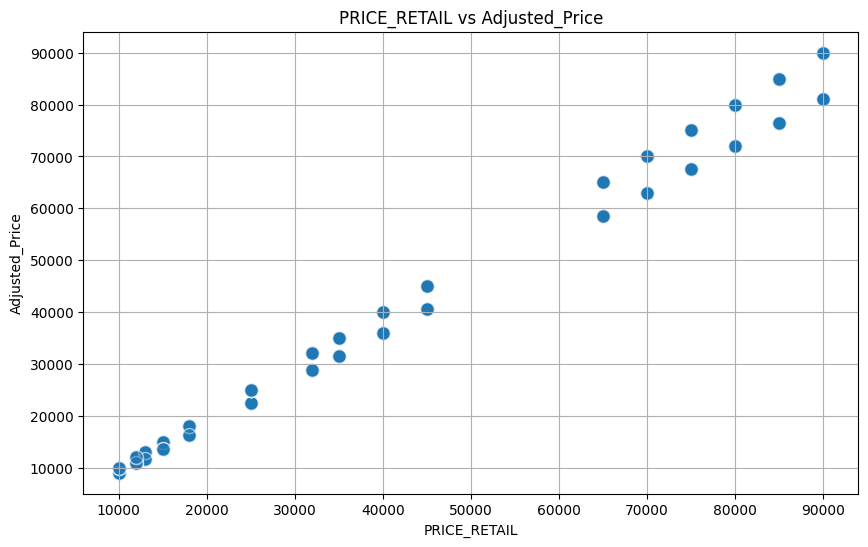

In [57]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PRICE_RETAIL'], df['Adjusted_Price'], alpha=0.6, edgecolors='w', s=100)
plt.title('PRICE_RETAIL vs Adjusted_Price')
plt.xlabel('PRICE_RETAIL')
plt.ylabel('Adjusted_Price')
plt.grid(True)
plt.show()

In [76]:
# Calculate the profit percentage for each mobile phone sale
data = df.copy()
data['profit_percentage'] = ((data['Adjusted_Price'] - data['PRICE_CURRENT']) / data['PRICE_RETAIL']) * 100
# Identify profitable sale where profit percentage is positive
profitable_sale = data[data['profit_percentage'] > 0]

# Identify loss sale where profit percentage is negative
loss_sale = data[data['profit_percentage'] < 0]


import plotly.graph_objects as go

# Calculate the count of profitable and loss sale
profitable_count = len(profitable_sale)
loss_count = len(loss_sale)
# Create a donut chart to show the distribution of profitable and loss sale
labels = ['Historical Priceing', 'Dynamic Priceing']
values = [profitable_count, loss_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_layout(title='Profitability of MobilePhone (Dynamic Pricing vs. Historical Pricing)')
fig.show()

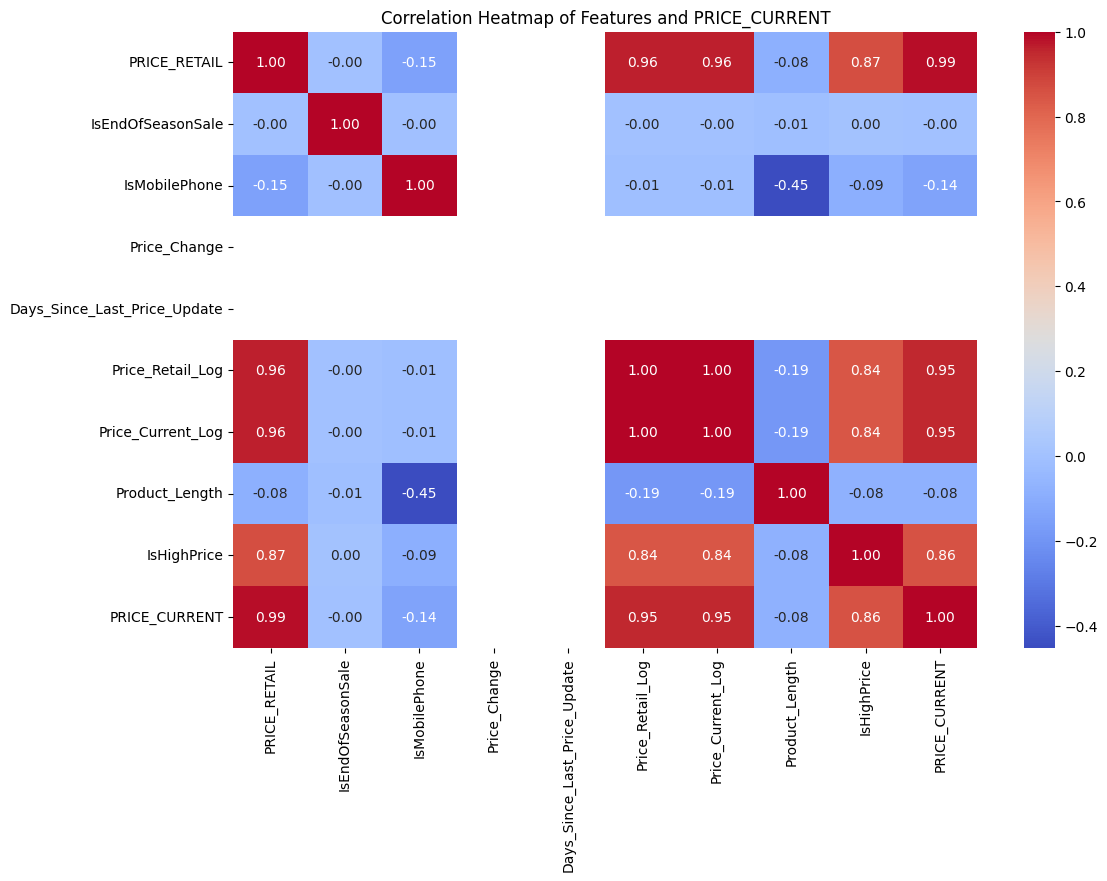

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[[ 'PRICE_RETAIL', 'IsEndOfSeasonSale', 'IsMobilePhone',
                   'Price_Change', 'Days_Since_Last_Price_Update', 'Price_Retail_Log',
                   'Price_Current_Log', 'Product_Length', 'IsHighPrice','PRICE_CURRENT']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and PRICE_CURRENT')
plt.show()

In [ ]:
!pip install gradio

In [65]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle

# Load the trained model
with open('random_forest_price_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to make predictions
def predict_price(price_retail, sale_event, is_mobile_phone, price_change, days_since_last_update, product_length, is_high_price, demand, inventory_level, competitor_pricing, time_of_day):
    # Feature engineering
    price_retail_log = np.log1p(price_retail)
    price_current_log = np.log1p(price_retail)  # Assuming current price starts as retail price

    # Prepare features for prediction
    features = pd.DataFrame({
        'PRICE_RETAIL': [price_retail],
        'IsEndOfSeasonSale': [int(sale_event == 'End of Season Sale')],
        'IsMobilePhone': [is_mobile_phone],
        'Price_Change': [price_change],
        'Days_Since_Last_Price_Update': [days_since_last_update],
        'Price_Retail_Log': [price_retail_log],
        'Price_Current_Log': [price_current_log],
        # 'Product_Length': [product_length],
        'IsHighPrice': [is_high_price],
        'DEMAND': [demand],
        'INVENTORY_LEVEL': [inventory_level],
        'COMPETITOR_PRICING': [competitor_pricing],
        'TIME_OF_DAY': [time_of_day]
    })

    # Convert categorical features to dummy variables
    features = pd.get_dummies(features, drop_first=True)

    # Ensure all columns match the model input
    for column in X.columns:
        if column not in features.columns:
            features[column] = 0
    features = features[X.columns]

    # Make prediction
    predicted_price = model.predict(features)[0]

    # Adjust the price based on the sale event
    if sale_event:
        adjusted_price = predicted_price * 0.9  # Apply a general discount for sales
    else:
        adjusted_price = predicted_price

    return f"Adjusted Price: ${adjusted_price:.2f}"
    # return f"Predicted Current Price: ${predicted_price:.2f}", f"Adjusted Price: ${adjusted_price:.2f}"

# Define Gradio interface components
inputs = [
    gr.Number(label="Retail Price", value='10'),
    gr.Checkbox(label="Sale Event"),
    gr.Checkbox(label="Is it a Mobile Phone?"),
    gr.Number(label="Price Change (%)", value=0.0),
    gr.Number(label="Days Since Last Price Update", value=0),
    # gr.Number(label="Product Name Length", value=10),
    gr.Checkbox(label="Is it High Priced?"),
    gr.Radio(choices=['High', 'Low'], label="Demand"),
    gr.Radio(choices=['High', 'Medium', 'Low'], label="Inventory Level"),
    gr.Radio(choices=['High', 'Low'], label="Competitor Pricing"),
    gr.Radio(choices=['AM', 'PM'], label="Time of Day")
]

outputs = [
    #gr.Textbox(label="Predicted Current Price"),
    gr.Textbox(label="Adjusted Price")
]

# Create the Gradio interface
gr_interface = gr.Interface(fn=predict_price, inputs=inputs, outputs=outputs, title="Dynamic Pricing App")

# Launch the app
gr_interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1002: UserWarning: Expected 11 arguments for function <function predict_price at 0x7c915f75c3a0>, received 10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1006: UserWarning: Expected at least 11 arguments for function <function predict_price at 0x7c915f75c3a0>, received 10.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://332fda2ca063e6859e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
